<a href="https://colab.research.google.com/github/ADITIGHANATHE/AML/blob/main/Assignment_1_AdvancedMachineLearning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

                                                         # Advanced Machine Learning
                                                       # Assignment 1 - Neural Network
                                                            # Name: Aditi Ghanathe
                                                           # student id : 811240551
                                              ##################################################

# Using the IMDB data set

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Encoding the integer sequences via multi-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [ ]:
# Storing input data in vectors

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# Converting output lables into floating-point numerical values

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


In [ ]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Model information

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Model from textbook example

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Model using different number of layers (1,2,3,4)

# model = keras.Sequential([
#     layers.Dense(16, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])

# Model using different number of units per layer (8,16,32,64)

# model = keras.Sequential([
#     layers.Dense(64, activation="relu"),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])

# Model using tanh activation function

# model = keras.Sequential([
#     layers.Dense(16, activation="tanh"),
#     layers.Dense(16, activation="tanh"),
#     layers.Dense(1, activation="sigmoid")
# ])

# Model using regulization (L1:0.001,0.002,0.005,0.01; L2:0.001,0.002,0.005,0.01)

# model = keras.Sequential([
#     layers.Dense(16, kernel_regularizer=regularizers.L2(0.01), activation="relu"),
#     layers.Dense(16, kernel_regularizer=regularizers.L2(0.01), activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])

# Model using dropout (0.1,0.2,0.5,0.7)

# model = keras.Sequential([
#     layers.Dense(16, activation="relu"),
#     layers.Dropout(0.7),
#     layers.Dense(16, activation="relu"),
#     layers.Dropout(0.7),
#     layers.Dense(1, activation="sigmoid")
# ])

# Model ensemble (1 layer, 64 nodes, regularizer.L2(0.002), dropout=0.5)

# model = keras.Sequential([
#     layers.Dense(64, kernel_regularizer=regularizers.L2(0.002), activation="relu"),
#     layers.Dropout(0.5),
#     layers.Dense(1, activation="sigmoid")
# ])



In [ ]:
# Compiling the model

# Model using rmsprop optimizer

# model.compile(optimizer="rmsprop",
#               loss="binary_crossentropy",
#               metrics=["accuracy"])

# Using adam optimizer below

# Model using binary_crossentropy loss function

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Model using mse loss function

# model.compile(optimizer="adam",
#               loss="mse",
#               metrics=["accuracy"])


In [ ]:
# Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6080 - accuracy: 0.7036 - val_loss: 0.4703 - val_accuracy: 0.8459
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3557 - accuracy: 0.8907 - val_loss: 0.3172 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2300 - accuracy: 0.9253 - val_loss: 0.2796 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1685 - accuracy: 0.9482 - val_loss: 0.2783 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1286 - accuracy: 0.9626 - val_loss: 0.2872 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1001 - accuracy: 0.9729 - val_loss: 0.3065 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 2s 79ms/step - loss: 0.0760 - accuracy: 0.9827 - val_loss: 0.3326 - val_accuracy: 0.8818
Epoch 8/20
30

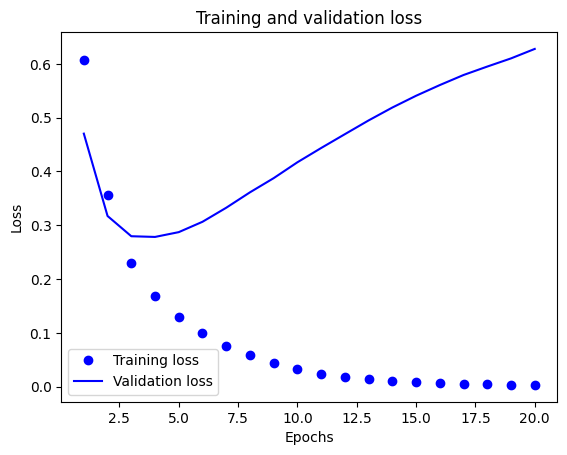

In [ ]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

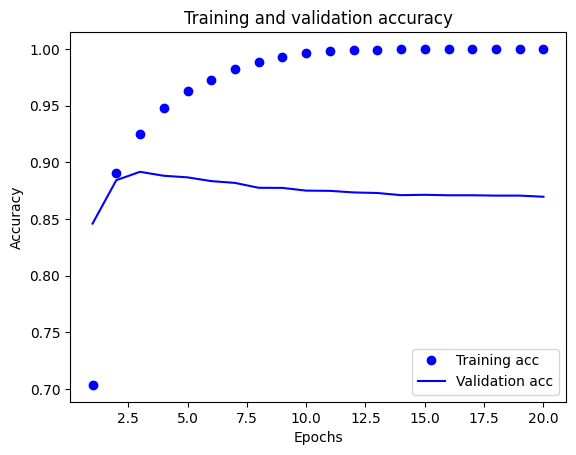

In [ ]:
# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Retraining the model from scratch

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2160 - accuracy: 0.9416
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.0958 - accuracy: 0.9700
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.0579 - accuracy: 0.9848
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.0390 - accuracy: 0.9926
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0264 - accuracy: 0.9959
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0187 - accuracy: 0.9978
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.0133 - accuracy: 0.9990
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.0098 - accuracy: 0.9994
Epoch 9/20
49/49 [==============================] - 1s 13ms/step - loss: 0.0075 - accuracy: 0.9996
Epoch 10/20
49/49 [==============================] - 1s 12ms/step - loss: 0.0058 - accuracy: 0.9998
Epoch 11/

[0.8651052117347717, 0.8564800024032593]

In [ ]:
# Using the trained model to generate predictions

predicted = model.predict(x_test)
predicted_round = np.around(predicted, 0)
error = predicted_round.flatten('C') - y_test.flatten('C')
predicted_accuracy = 1. - np.sum(np.abs(error))/len(error)
predicted_accuracy

782/782 [==============================] - 2s 2ms/step


0.85648